# Εργασία 2 – Δέντρα Απόφασης & Τυχαία Δάση / Decision Trees & Random Forest

## Libraries

In [83]:
import kagglehub

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier


## Import data from kaggle

In [26]:
# Get kaggle path
path = kagglehub.dataset_download("adityakadiwal/water-potability")
# Get dataset from kaggle
csv_path = os.path.join(path, "water_potability.csv")

# Import dataset into a Data Frame
df = pd.read_csv(csv_path)
df.head()

Using Colab cache for faster access to the 'water-potability' dataset.


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Task 1
 Load the data into a DataFrame. Then, describe it and create a histogram for each attribute, as well as a bar graph for the Potability variable. Report the number of missing values ​​for each attribute and the percentages of potable and non-potable water in the examples. Do you consider the quality of the data to be satisfactory?



### Describe every feature

In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Make histograms for every feature
---
Use subplots and a for loop to make them all together at once

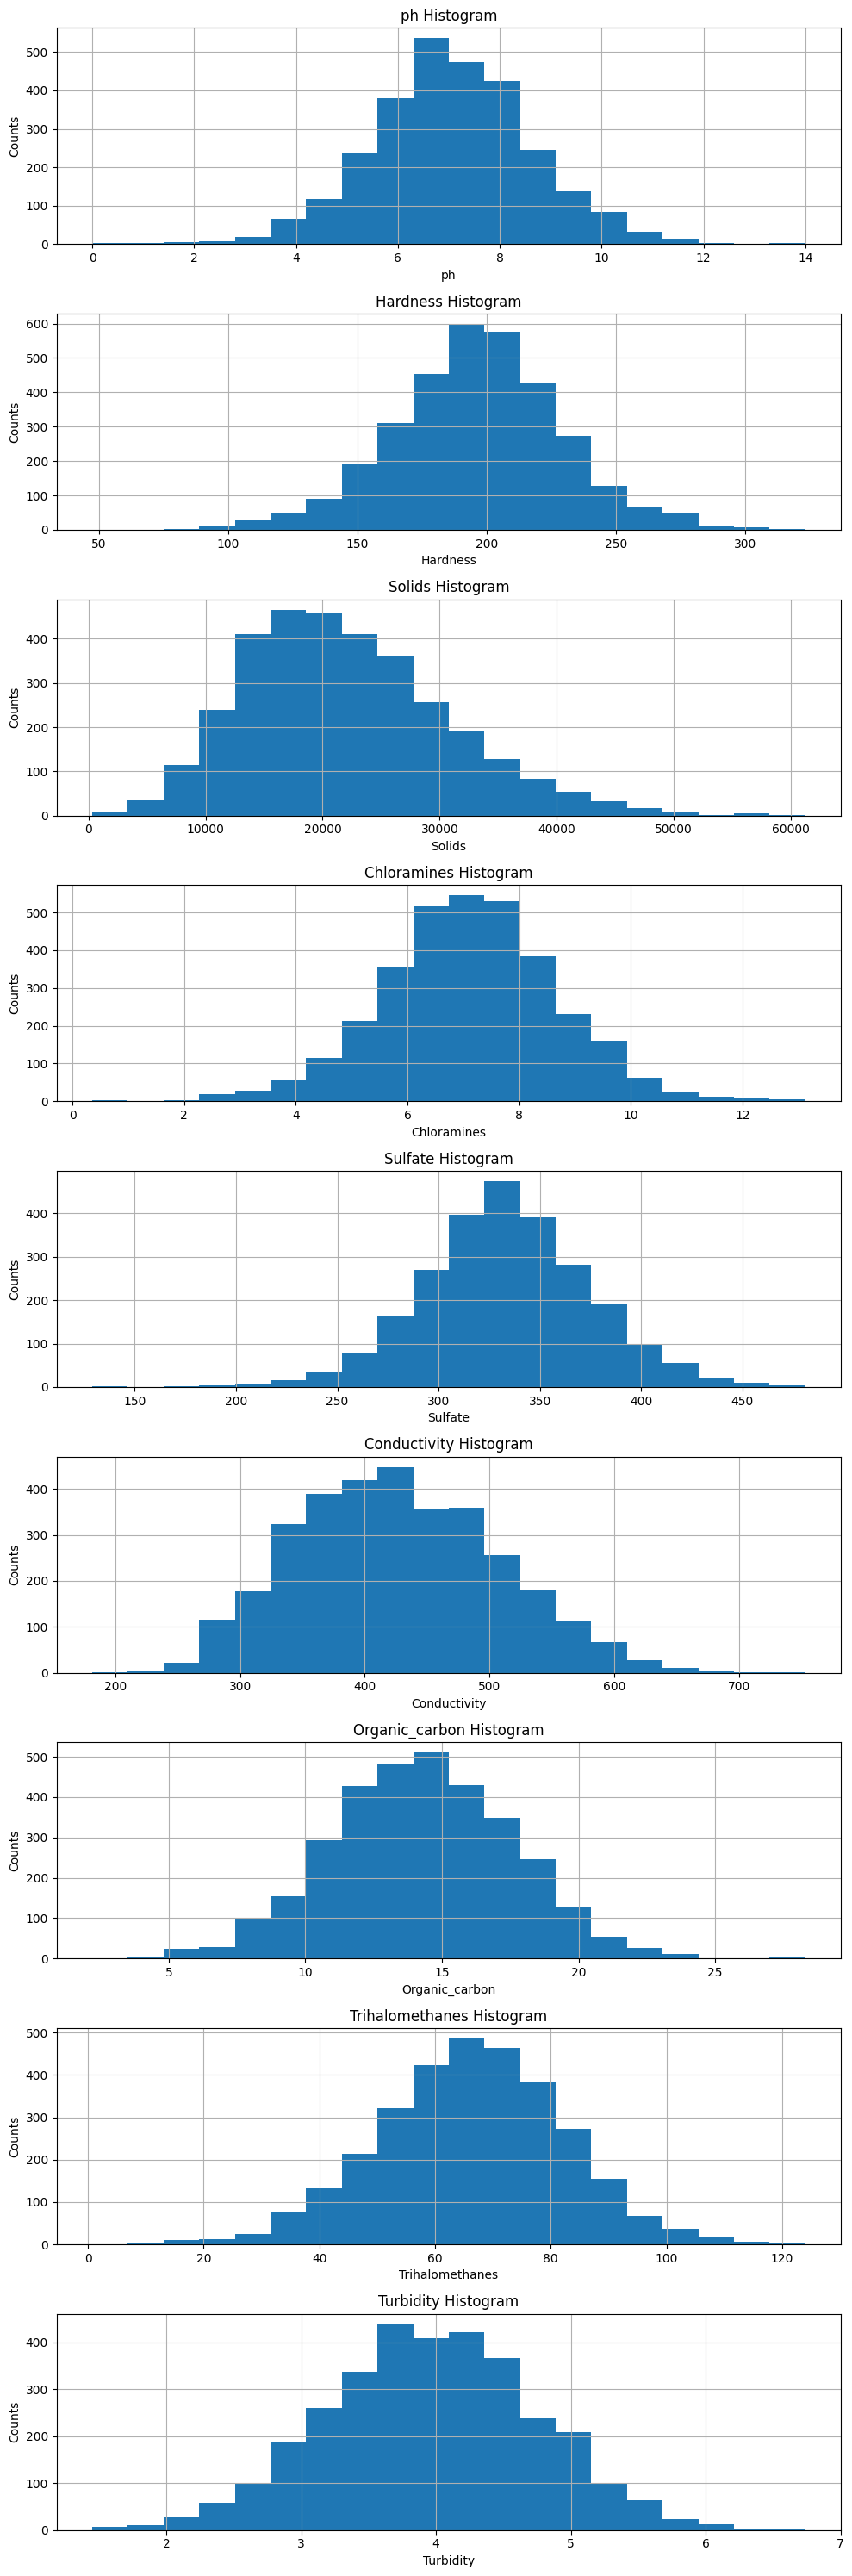

In [6]:
# Input column names into a list
columns = list(df.columns)
columns = columns[:-1] # Remove Outcome keep only --> ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Get how many columns we have
column_length = len(columns)

# Call subplots to create plot for every column in dataFrame
fig, axes = plt.subplots(column_length, 1, figsize=(10, 30))

# For every column in df create a histogram plot with:
# - General title
# - x and y title
for i, col in enumerate(columns):
  ax = axes[i]
  ax.hist(df[col], bins=20)
  ax.set_xlabel(col)
  ax.set_ylabel("Counts")
  ax.set_title(f"{col} Histogram")
  ax.grid()
  plt.tight_layout() # tight layout keep distances between plots because x label was overlapping title

# Show every plot
plt.show()

### Create bar plot for target value (Potability)
---
- Use seaborn library because of the countplot ready function
- Change color for better visualization

/tmp/ipython-input-460049324.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Potability',palette = "Set2")


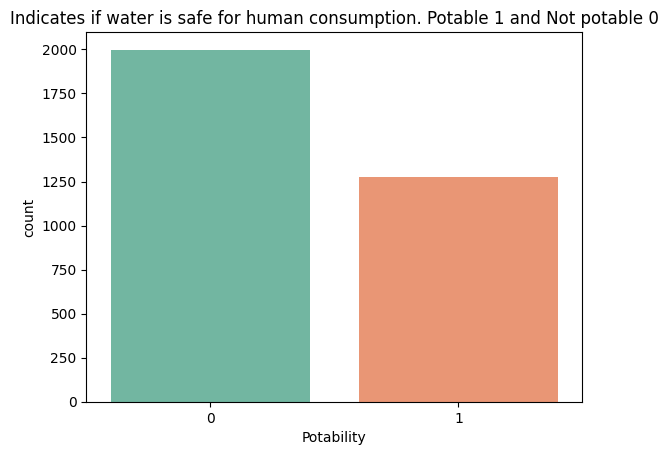

Potability
0    1998
1    1278
Name: count, dtype: int64


In [7]:
sns.countplot(data=df, x='Potability',palette = "Set2")
plt.title("Indicates if water is safe for human consumption. Potable 1 and Not potable 0")
plt.show()
print(df['Potability'].value_counts())

### Count number of Nan values
---
ph --> 491  
Hardness --> 0  
Solids --> 0  
Chloramines --> 0  
Sulfate --> 781  
Conductivity --> 0  
Organic_carbon --> 0  
Trihalomethanes --> 162  
Turbidity --> 0  
Potability --> 0  


**Observations:**

Regarding dataset has only 3276 rows **sulfate** and **ph** number of nan values is pretty high (14,98% of the ph values are nan | 23,84% of the sulfate values are nan). **Trihalomethanes** also have nan values but the number of them is pretty low and so there might not be a high challenge to encounder them.

*It is important that, there are no nan values to the target value (most important feature)*




In [8]:
# Get nan values and count them for every column (reset index to make the df readable)
nan_values = df.isna().sum().reset_index()
nan_values.columns = ['Feature', 'Count_of_nan_values'] # Set column name more readable
nan_values

,Feature,Count_of_nan_values
0,ph,491
1,Hardness,0
2,Solids,0
3,Chloramines,0
4,Sulfate,781
5,Conductivity,0
6,Organic_carbon,0
7,Trihalomethanes,162
8,Turbidity,0
9,Potability,0


### Percentage of Potable and Not potable water
---
Potable water percentage = 39.01%

Non potable water percentage = 60.99%%

**Observations:**
These values provides an unbalanced dataset. Unbalance is not very high but also not very low.


In [9]:
# Save target value
potability = df["Potability"]

# Count how many values are inside (there are not nan values so there is no problem just count)
sum_potability = potability.count()

count_potable = potability[potability == 1].count() # Count potable water (label 1)
count_non_potable = potability[potability == 0].count() # Count non potable water (label 0)

# Get the percentage
potable = (count_potable/sum_potability) *100
non_potable = (count_non_potable/sum_potability) *100

print("*"*50)
print(f"Potable water percentage --> {potable:.2f}%")
print("-"*50)
print(f"Non potable water percentage --> {non_potable:.2f}%")
print("*"*50)

**************************************************
Potable water percentage --> 39.01%
--------------------------------------------------
Non potable water percentage --> 60.99%
**************************************************


### Answer: The data quality is considered satisfactory ?

Yes it is. The nan and unbalanced problems are not unsolved problems or so high that cannot be encoundered. The dataset satisfy us but with a bit of preprocessing to encounter nan values and unbalance so it will help to train the model and get good results.

## Task 2

According to the World Health Organization (WHO), the recommended pH levels for water are 6.5 and 8.5. Calculate the percentages of potable and non-potable water in the examples for

1) pH<6.5,
2) 6.5≤pH≤8.5 and
3) 8.5<pH. To what extent is this property verified in your data?

In [10]:
# Get values and remove nan (because Nans are not initialized so we cannot inlcude them to the answer)
ph_values = df['ph'].dropna()

ph_low = ph_values[ph_values < 6.5].count()
ph_normal = ph_values[(ph_values >= 6.5) & (ph_values <= 8.5)].count()
ph_high = ph_values[ph_values > 8.5].count()

print("*"*50)
print(f" Count of pH < 6.5: {ph_low}")
print("-"*50)
print(f" Count of 6.5 ≤ pH ≤ 8.5: {ph_normal}")
print("-"*50)
print(f" Count of 8.5 < pH: {ph_high}")
print("*"*50)

**************************************************
 Count of pH < 6.5: 968
--------------------------------------------------
 Count of 6.5 ≤ pH ≤ 8.5: 1328
--------------------------------------------------
 Count of 8.5 < pH: 489
**************************************************


### Answer: To what extent is this property verified in your data?

| pH                    | Count  | Percentage (%)  |
|-----------------------|:------:|:------------:|
| pH < 6.5              | 968    | 34.75%       |
| 6.5 ≤ pH ≤ 8.5        | 1328   | 47.69%       |
| pH > 8.5              | 489    | 17.56%       |


This property is partially verified in the data. Count of ph in range 6.5 ≤ pH ≤ 8.5 was 1328 which means the 47% of the dataset. This is the highest value bwtween others but also not so big since the ~53% of the dataset values are out of this range meaning that most of the people are not into the range of the recommended pH levels.

## Task 3

According to the WHO, the recommended chloramine levels are up to 4 ppm. Create a scatter plot between

- x: pH and
- y: Chloramine

in which you color the potable examples in blue and the non-potable ones in red. What do you notice about the separability of the examples?

### Answer: What do you notice about the separability of the examples?

Regardless the recommended chloramine levels scatterplot shows something different. All values are between 4-10 ph meaning that Chloramine feature is not so good for predictions because it is very difficult the separability.
There is high overlap between target value categories  

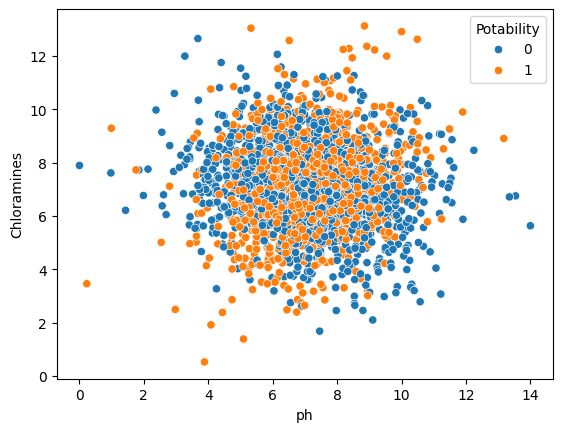

In [11]:
sns.scatterplot(df, x='ph', y='Chloramines', hue="Potability")
plt.show()

### Task 4
 Fill in the missing values ​​(if any). You can use the pandas fillna() function. For simplicity, you can use a constant (e.g. df[‘x’] = df[‘x’].fillna(c) where c 0 or -1 if there are no other such values ​​in the column). Alternatively, you can fill in with the mean value (e.g. df[‘x’] = df[‘x’].fillna(df[‘x’].mean()). This step is necessary as you cannot proceed with training the tree (scikit-learn does not automatically handle missing values ​​in trees).

### Answer: Code explanation
I got every nan column name and I did a for loop filling nan values with the mean of the column

In [12]:
# Get columns with nan values
column_not_nan_index = nan_values[nan_values['Count_of_nan_values'] != 0].values

# Get the names of the columns
columns = column_not_nan_index[:, 0]

# For loop over every column and fill nan values with mean
for c in columns:
  df[c] = df[c].fillna(df[c].mean())
  print(f"Column {c} finished ✅")

# Show results
df.isna().sum()

Column ph finished ✅
Column Sulfate finished ✅
Column Trihalomethanes finished ✅


,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


## Task 5
Create numpy arrays with appropriate inputs (x) and targets (y), where target is potability. Split the data into train-test in a ratio of 70-30 respectively with 0 seed.

In [13]:
# Set input x to np arrays and y target to np arrays to
X = df.drop(['Potability'], axis=1).to_numpy()
y = df['Potability'].to_numpy()

# Initialize variables
test_size = 0.3
seed = 0

# Split dataset into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## Task 6
Train a Decision Tree classifier on the train set and then measure its accuracy on the train and test sets.

Consult the documentation: [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [14]:
clf = tree.DecisionTreeClassifier(random_state=seed)
clf

DecisionTreeClassifier(random_state=0)

In [15]:
clf.fit(X_train, y_train)
# tree.plot_tree(clf)

DecisionTreeClassifier(random_state=0)

### Answer: What are my observations

There is a clear overfitting. Model was trained well with training set but learn data so good that cannot generalize well on test set. This is the reason why train set has 100% accyracy when test set has 57% accuracy. Model quality is measured with test set and not with train set and so model is not trained well

In [16]:
# Get predictions for train test
y_predict_train = clf.predict(X_train)
# Get accuracy score
accuracy_train = accuracy_score(y_train, y_predict_train)

# Get predictions for test set
y_predict_test = clf.predict(X_test)
# Get accuracy score
accuracy_test = accuracy_score(y_test, y_predict_test)

print("="*41)
print(f"Accuracy percentage for train set: {accuracy_train*100}%")
print("-"*41)
print(f"Accuracy percentage for test set: {accuracy_test*100:.2f}%")
print("="*41)


Accuracy percentage for train set: 100.0%
-----------------------------------------
Accuracy percentage for test set: 57.48%


## Task 7
Repeat query 5, trying the following combinations: criterion (gini, entropy), max-depth (None, 3, 5), min-samples-split (2, 5), min-samples-leaf (1, 2), max-features (None, sqrt), cost-complexity-pruning (0, 0.01). Create a precision table in train-test for each combination with pandas, where the columns will be the values ​​of each feature, as well as train acc, test acc.

### Answer: Code explanation

This task is complicated regarding there are 96 different combinations for these parameters.

**Implementation**:
- Initialize all different paramater values into lists
- Create a result list to store output info (parameter values and the accuracy for train and test)
- A for loop using product to test every single combination. Inside for loop
  - Create Decision Tree giving different parameters every time
  - Train the model
  - Make predictions for train-test set
  - Calculte accuracy for train-test set
  - Append results into the list


In [17]:
# Initialize Decision tree parameters
criteria = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_samples_splits  = [2, 5]
min_samples_leafs = [1, 2]
max_features = [None, 'sqrt']
cost_complexity_pruning  = [0.0, 0.01]

# Create a dict to save the accuracy results for test and train set
result_list = []

for cri, max_d, min_s, min_l, max_f, ccp in product(criteria, max_depths, min_samples_splits, min_samples_leafs, max_features, cost_complexity_pruning):

  # Create model --> setting parameters
  clf = tree.DecisionTreeClassifier(
      criterion=cri,
      max_depth=max_d,
      min_samples_split=min_s,
      min_samples_leaf=min_l,
      max_features=max_f,
      ccp_alpha = ccp,
      random_state=seed)

  # Train model
  clf.fit(X_train, y_train)

  # Get predictions for train test
  y_predict_train = clf.predict(X_train)
  # Get accuracy score
  accuracy_train = accuracy_score(y_train, y_predict_train)

  # Get predictions for test set
  y_predict_test = clf.predict(X_test)
  # Get accuracy score
  accuracy_test = accuracy_score(y_test, y_predict_test)

  # Save info into a list
  result_list.append({
      'criterion': cri,
      'max_depth': max_d,
      'min_samples_split': min_s,
      'min_samples_leaf': min_l,
      'max_features': max_f,
      'ccp_alpha': ccp,
      'accuracy_train': accuracy_train,
      'accuracy_test': accuracy_test,
      })

# Convert list to dataframe to make results more readable
results_df = pd.DataFrame(result_list)
results_df

,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,accuracy_train,accuracy_test
0,gini,NaN,2,1,None,0.00,1.000000,0.574771
1,gini,NaN,2,1,None,0.01,0.605321,0.620549
2,gini,NaN,2,1,sqrt,0.00,1.000000,0.622584
3,gini,NaN,2,1,sqrt,0.01,0.605321,0.620549
4,gini,NaN,2,2,None,0.00,0.951592,0.581892
...,...,...,...,...,...,...,...,...
91,entropy,5.0,5,1,sqrt,0.01,0.620148,0.626653
92,entropy,5.0,5,2,None,0.00,0.671173,0.655137
93,entropy,5.0,5,2,None,0.01,0.620148,0.626653
94,entropy,5.0,5,2,sqrt,0.00,0.642826,0.620549


## Task 8
Choose the combination with the highest accuracy in the test when max-depth = 3. Then, retrain this tree and visualize its structure [plot tree](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.plot_tree.html). Describe the rules that the tree extracted.

### Answer: Code explanation

**Implementation:**
- Get only values with max_depth = 3
- Store index of the max test accuyracy value
- Keep only parameters with values (drop 'accuracy_train', 'accuracy_test')
- Convert max_depth to integer to prevent error while training the model
- Train model giving the best parameters

In [18]:
# Store only max_depth = 3
max_depth_3 = results_df[results_df['max_depth'] == 3]
# Get location of the best accuracy in test set
max_accuracy_score = max_depth_3['accuracy_test'].idxmax()

# Store best_accuracy_row variables (drop 'accuracy_train', 'accuracy_test' so we can pass best_accuracy_row as parameter below)
best_accuracy_row = max_depth_3.loc[max_accuracy_score].drop(['accuracy_train', 'accuracy_test'], axis=0)
# Change type of the max_depth to int because float will cause error
best_accuracy_row['max_depth'] = int(best_accuracy_row['max_depth'])
best_accuracy_row

,64
criterion,entropy
max_depth,3
min_samples_split,2
min_samples_leaf,1
max_features,None
ccp_alpha,0.0


In [19]:
# Create a dictionary with the datafram values of the best test accuracy
parameters = dict(best_accuracy_row)
parameters

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_split': np.int64(2),
 'min_samples_leaf': np.int64(1),
 'max_features': None,
 'ccp_alpha': np.float64(0.0)}

In [20]:
# Unpack the key and values of dictionary and pass them into the model
clf = tree.DecisionTreeClassifier(**parameters, random_state=seed)
clf

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), criterion='entropy',
                       max_depth=3, min_samples_leaf=np.int64(1),
                       min_samples_split=np.int64(2), random_state=0)

In [21]:
# Train model
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), criterion='entropy',
                       max_depth=3, min_samples_leaf=np.int64(1),
                       min_samples_split=np.int64(2), random_state=0)

In [22]:
# Print test accuracy to ensure everything went okay
y_pred = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print(acc_test)

0.6398779247202442


### Answer: Describe the rules that the tree extracted

First things first it is important to translate what x[i] means in tree. x[i] is the feature(column) name. With df.columns we match every index with the column name:

x[0] = ph

x[1] = Hardness

x[2] = Solids

x[3] = Chloramines

x[4] = Sulfate

x[5] = Conductivity

x[6] = Organic_carbon


....


Since now we matched names with values it is easier to find out what Decision tree shows.
- Starting with Sulfate feature model split it into two parts with threshold equal to 259. If the value is lower than 259 then the model goes to the left subtree. If the value is greater than 259 then goes to the right subtree.

  Entropy = 0.968 is pretty high. Σmall entropy --> cleaner node --> more “safe” rule. Also model put Sulfate as the root of the tree meaning this is the most important feature of the training part.

  value = [1388, 905]. This means 1388 are 0 (not drikable water) and 905 (drinkable water)

**Left Subtree of root**

- Left subtree of Sulfate: The left part of the subtree is the Solid feature. Solid is the total dissolved solids in ppm. If solid is greater than 21161 then model move to the right subtree else to the left subtree.
  
  Entropy = 0.771 is also pretty high. It is better than the previous entropy meaning that the model is more confident in his decisions. Still pretty high, the model still cannot seperate drinkable and not water.

  value = [14, 48] This means 14 are 0 (not drikable water) and 48 are 1  (drinkable water).

- In the left side of the sulfate subtree there is the ph feature.

  Model got worst entropy = 0.982 meaning that it is confused and cannot find the categorie having only these 3 features.

  - If ph is lower than 7 then move to the left subtree where is the leaf and the entropy is = 0.837. The model could not distinguish the examples
  - If ph is greater than 7904 then move to the right subtree where is the last leaf of this node with entropy = 0.0. This is ideal since the model found and categorize with 3 features the water and knows it is not drinkable if:
  
    **Sulfate <= 259 + Solids <= 21161 and ph > 7**

- In the right side of the sulfate subtree there is the hardness feature.

  model got better entropy = 0.365 meaning that this feature help the model to categorize if the water is drinkable or not, better. This is pretty low entropy and so the model is close to find correct labels for the samples it gets.

    - If hardness is less than 220 then move to the left leaf where model got zero entropy meaning that the combination of

      **Sulfate <= 259 + Solids > 21161 and hardness <= 220**

      lead the model to predict that the water is not drinkable since it managed to separate the data into one class.

**Right Subtree of root**
- Right subtree of Sulfate: If sulfate value is more than 259 then the tree goes again to sulfate feature adding a new threshold to seperate the data. New threshold is 387.  

  With entropy equals to 0.961 the model cannot seperate well the dataset.

- When sulfate is less than 387 then move to the left subtree into the ph feature.

  Entropy = 0.952 cannot find a way to seperate data with only these two rules.  
  
  - If ph is less or equal to 4.636 then move to the left leaf of the tree where model makes the final seperation of the data. It is more confident than before since entropy is 0.71. Still not a good results but better than before. This might happen of the small tree depth since dataset is complicated there are many samples with overlap and the model cannot find the correct answer with only 3 features.

  - If pf is greater than 4.636 then move to the right leaf of the tree. Entropy is equal to 0.958 meaning that if:

    **387.328 >= Sulfate > 259.026  and ph > 4.636**

    Then model is completely unsure about the prediction is going to provide.

- When sulfate is greater than 387 then move to the right subtree into the ph feature. As before the model with Sulfate feature cannot seperate the dataset with entropy = 0.994. By adding the ph feature the tree split into two leafs:
  - If ph <= 7.069 then model seperate the values a bit better with entropy = 0.759. This combination:

  **Sulfate > 387.328  and ph <= 7.069**  
  Leads the model to predict that the water is not drinkable but model is unsure about the prediction.

  if ph > 7.069 then leaf shows an entropy = 0.939. This value is not desirable since model prediction is completly random.


**Conclusion:** It is more difficult for the model to seperate the data if the water is drinkable rather than not. It is shown by looking at leafs where entropy is small or zero when water is not drinkable and 0.9 or more when drinkable samples are more.


In [36]:
feature_names = list(df.drop('Potability', axis = 1).columns)
feature_names

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

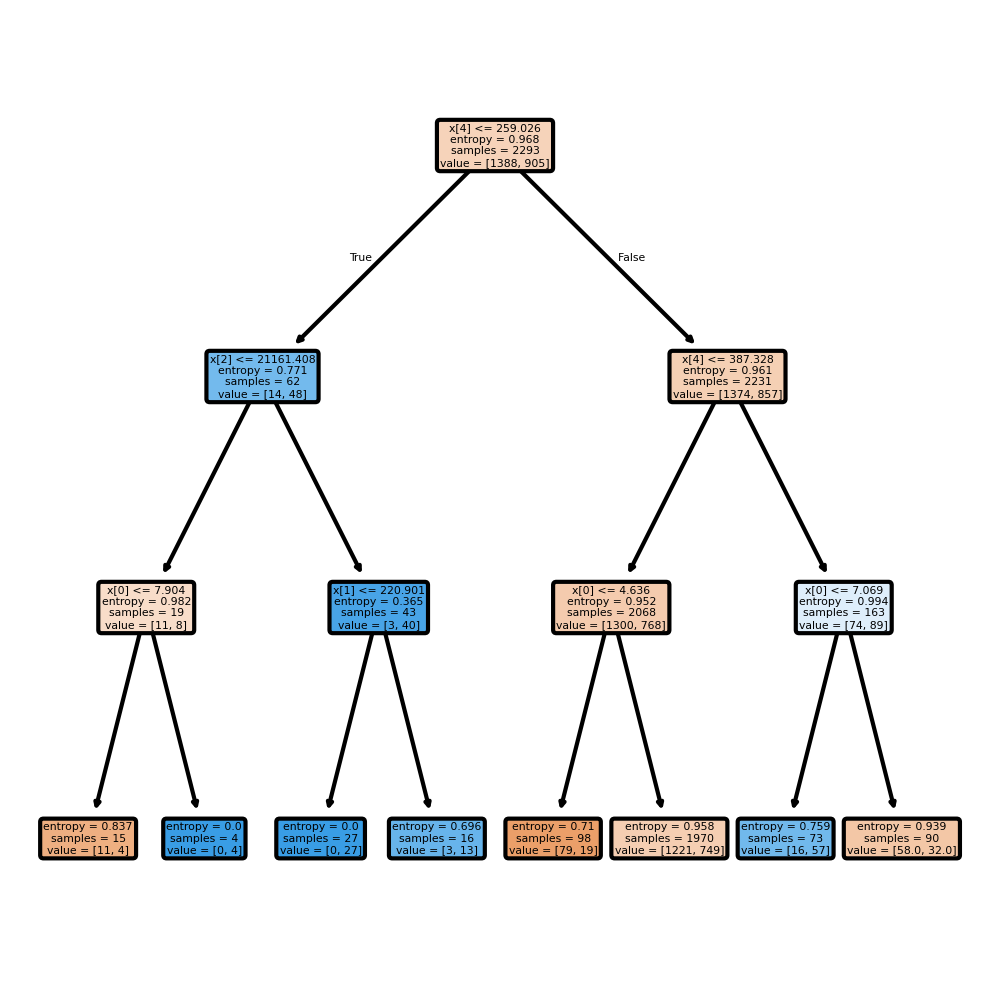

In [24]:
# Add parameters to make tree easy to be read
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,filled=True,rounded=True, ax=axes)

# Save tree to analyze image in better details
plt.savefig('Decision Tree max_depth 3.png')

## Task 9
Choose the combination with the highest accuracy in the test, retrain the tree, and create a bar chart with the importance of each feature (feature importance) according to this tree. If the device can support up to 5 chemical analyses, which features should it extract from the water? Justify.

### Answer: Code explanation
Code is the same as before but in this example remove the max_depth = 3 to get the best accuracy

In [41]:
# Get location of the best accuracy in test set
max_accuracy_score = results_df['accuracy_test'].idxmax()

# Store best_accuracy_row variables (drop 'accuracy_train', 'accuracy_test' so we can pass best_accuracy_row as parameter below)
best_accuracy_row = results_df.loc[max_accuracy_score].drop(['accuracy_train', 'accuracy_test'], axis=0)

# Change type of the max_depth to int because float will cause error
best_accuracy_row['max_depth'] = int(best_accuracy_row['max_depth'])
best_accuracy_row

# Create a dictionary with the datafram values of the best test accuracy
parameters = dict(best_accuracy_row)
parameters

# Unpack the key and values of dictionary and pass them into the model
clf = tree.DecisionTreeClassifier(**parameters, random_state=seed)
clf

# Train model
clf.fit(X_train, y_train)

# Print test accuracy to ensure everything went okay
y_pred = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print(acc_test)

0.6551373346897253


### Answer: If the device can support up to 5 chemical analyses, what characteristics should it extract from the water?

To answer the question use the feature_importances_. It is a ready function which returns the feature importances for every feature. Greater the feature importance --> more critical feature.

By looking at the barplot 5 of the most important features are:

- **Sulfate**
- **ph**
- **Chloramines**
- **Hardness**
- **Solids**

Since these are the most important features and if the device can support up to 5 chemical analyses then these features will be choosed. These features will lead the model to seperate data with the best possible way to get highest accuracy we can get from the model (if machine can handle only 5 chemical analyses) rather than choosing other feature combinations.


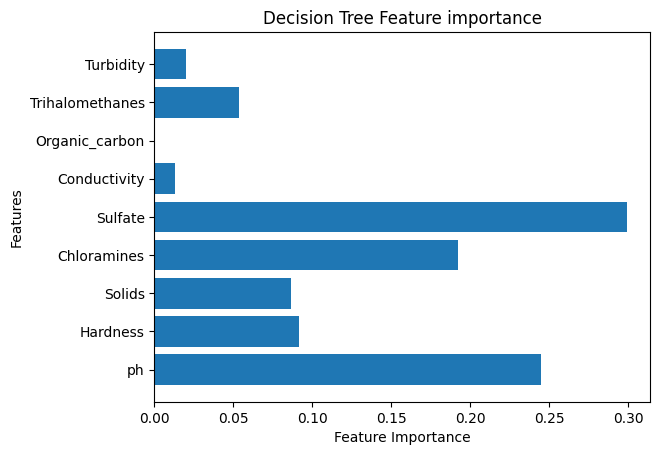

In [42]:
importance_weights = clf.feature_importances_
plt.barh(feature_names, importance_weights)
plt.title('Decision Tree Feature importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

## Task 10
Explain the reasons why a Random Forest might achieve better accuracy than a Decision Tree.

### Answer: Explain the reasons why a Random Forest might achieve better accuracy than a Decision Tree

There are many key differences between these two models. They have some things in common but the wau they are working is not the same.

**Resons why Random Forest will might get better accuracy:**
Random Forest is a collection of Decision Trees trained on the same dataset but in different forms since it uses the bootstraping method. Trees inside random forest are trained on random sampled subsets of the data and so training is random.

Also random forest is less prone to overfitting. This can happen because trees can become very complex. Random forest incounter this problem by using multiple trees which reduces the variance of the model.


**Conclusion:** These are the most important characteristics that can lead the random forest to provide better results. In this dataset the data is mixed up with each other. This lead the decision tree to overfitting or underfitting since accuracy in some cases was 100% on training set and less than 60% on test set. Since Random forest provide solutions and encounter overfitting and underfitting it is more likely to get better results.


## Task 11
Repeat query 6 using Random Forest https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html . Set seed to 0. Additionally, add the number of trees (n_estimators) for 50, 100, and 200 trees to the combinations.

In [48]:
# Initialize Decision tree parameters
criteria = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_samples_splits  = [2, 5]
min_samples_leafs = [1, 2]
max_features = [None, 'sqrt']
cost_complexity_pruning  = [0.0, 0.01]
n_estimators = [50, 100, 200]

# Create a dict to save the accuracy results for test and train set
result_list = []
count = 1

for cri, max_d, min_s, min_l, max_f, ccp, n_esti in product(criteria, max_depths, min_samples_splits, min_samples_leafs, max_features, cost_complexity_pruning, n_estimators):

  # Create model --> setting parameters
  rdf = RandomForestClassifier(
      criterion = cri,
      max_depth = max_d,
      min_samples_split = min_s,
      min_samples_leaf = min_l,
      max_features = max_f,
      ccp_alpha = ccp,
      n_estimators = n_esti,
      random_state=seed)

  # Train model
  rdf.fit(X_train, y_train)

  # Get predictions for train test
  y_predict_train = rdf.predict(X_train)
  # Get accuracy score
  accuracy_train = accuracy_score(y_train, y_predict_train)

  # Get predictions for test set
  y_predict_test = rdf.predict(X_test)
  # Get accuracy score
  accuracy_test = accuracy_score(y_test, y_predict_test)

  # Save info into a list
  result_list.append({
      'criterion': cri,
      'max_depth': max_d,
      'min_samples_split': min_s,
      'min_samples_leaf': min_l,
      'max_features': max_f,
      'ccp_alpha': ccp,
      'n_estimators': n_esti,
      'accuracy_train': accuracy_train,
      'accuracy_test': accuracy_test,
      })
  print(f"Loop {count} finished successfuly.....✅")
  count+=1

# Convert list to dataframe to make results more readable
rdf_results_df = pd.DataFrame(result_list)
rdf_results_df

Loop 1 finished successfuly.....✅
Loop 2 finished successfuly.....✅
Loop 3 finished successfuly.....✅
Loop 4 finished successfuly.....✅
Loop 5 finished successfuly.....✅
Loop 6 finished successfuly.....✅
Loop 7 finished successfuly.....✅
Loop 8 finished successfuly.....✅
Loop 9 finished successfuly.....✅
Loop 10 finished successfuly.....✅
Loop 11 finished successfuly.....✅
Loop 12 finished successfuly.....✅
Loop 13 finished successfuly.....✅
Loop 14 finished successfuly.....✅
Loop 15 finished successfuly.....✅
Loop 16 finished successfuly.....✅
Loop 17 finished successfuly.....✅
Loop 18 finished successfuly.....✅
Loop 19 finished successfuly.....✅
Loop 20 finished successfuly.....✅
Loop 21 finished successfuly.....✅
Loop 22 finished successfuly.....✅
Loop 23 finished successfuly.....✅
Loop 24 finished successfuly.....✅
Loop 25 finished successfuly.....✅
Loop 26 finished successfuly.....✅
Loop 27 finished successfuly.....✅
Loop 28 finished successfuly.....✅
Loop 29 finished successfuly.

,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,n_estimators,accuracy_train,accuracy_test
0,gini,NaN,2,1,None,0.00,50,1.000000,0.672431
1,gini,NaN,2,1,None,0.00,100,1.000000,0.677518
2,gini,NaN,2,1,None,0.00,200,1.000000,0.685656
3,gini,NaN,2,1,None,0.01,50,0.619712,0.626653
4,gini,NaN,2,1,None,0.01,100,0.619712,0.626653
...,...,...,...,...,...,...,...,...,...
283,entropy,5.0,5,2,sqrt,0.00,100,0.681204,0.652085
284,entropy,5.0,5,2,sqrt,0.00,200,0.682948,0.648016
285,entropy,5.0,5,2,sqrt,0.01,50,0.623637,0.628688
286,entropy,5.0,5,2,sqrt,0.01,100,0.623637,0.628688


### Conclusion
Random Forest had better results than decision tree meaning that the assumptions were correct.

In [62]:
max_idx = rdf_results_df['accuracy_test'].idxmax()
train_max_accuracy_score = rdf_results_df.loc[max_idx, 'accuracy_train']
test_max_accuracy_score = rdf_results_df.loc[max_idx, 'accuracy_test']

print("="*45)
print(f"Max accuracy percentage for train set: {train_max_accuracy_score*100}%")
print("-"*45)
print(f"Max accuracy percentage for test set: {test_max_accuracy_score*100:.2f}%")
print("="*45)


Max accuracy percentage for train set: 100.0%
---------------------------------------------
Max accuracy percentage for test set: 69.79%


## Task 12
What is more important for the model, to predict drinking water well, but losing accuracy from non-drinking water, or to predict non-drinking water better, losing accuracy from drinking water? Justify.

### Answer: What is more important for the model, to predict drinking water well, but losing accuracy from non-drinking water, or to predict non-drinking water better, losing accuracy from drinking water?

It is more important for the model to predict non-drinking water and lose accuracy on drinkable water instead of the opposite. When target value affect human health then it is important to focuse to predict the factor that can cause damage, harm or put human life in danger better than when it is not happen. If water is not drinkable and model provide the opposite answer then it might lead to health problem. Instead if water is drinkable and model provide an answer that it is not then there is no problem it is safer to mislabel a drinkable water rather than a non-drinkable one.


In conclusion model should aim for high precision because this metric calculates how confident the model is to predict if water is drinkable or not.

## Task 13
What is legally safer for the company, using the best tree or the best random forest? Justify.

### Answer: What is legally safer for the company, using the best tree or the best random forest? Justify.

To give an answer it is important to calculate the precision (focus on false positive) of the models with the best accuracy. It is crucial as we mention before to get not the best accuracy but the safest answers.

- Get best accuracy models
- Get the precision of each
- Compare the results
- Highest precision = Best model for company to be legally safe

**Final Results:**
- Decision Tree precision = 0.6164383561643836
- Random Forest precision = 0.69

Precision is not as good as we excpect for both models but if the company had to choose, Random Forest surpasses Decision tree in Test accuracy and also Precision score and it could be a safer model to use.


In [84]:
# Model was trained in previous task
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred)
print("Precision: ",precision)

Precision:  0.6164383561643836


### Get best Random forest

In [85]:
# Get location of the best accuracy in test set
max_accuracy_score = rdf_results_df['accuracy_test'].idxmax()

# Store best_accuracy_row variables (drop 'accuracy_train', 'accuracy_test' so we can pass best_accuracy_row as parameter below)
best_accuracy_row = rdf_results_df.loc[max_accuracy_score].drop(['accuracy_train', 'accuracy_test'], axis=0)

try:
  # Change type of the max_depth to int because float will cause error
  best_accuracy_row['max_depth'] = int(best_accuracy_row['max_depth'])
except Exception as e:
  print(f"Max depth cause an error --> {e}")
  print("Try different method.....")
  print("-"*70)
  best_accuracy_row['max_depth'] = None

# Create a dictionary with the datafram values of the best test accuracy
parameters = dict(best_accuracy_row)

# Unpack the key and values of dictionary and pass them into the model
rdf = RandomForestClassifier(**parameters, random_state=seed)

# Train model
rdf.fit(X_train, y_train)

# Find recall
y_pred = rdf.predict(X_test)
precision = precision_score(y_test, y_pred)
print("Precision:",precision)


Max depth cause an error --> cannot convert float NaN to integer
Try different method.....
----------------------------------------------------------------------
Precision: 0.69
